In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV,learning_curve,cross_val_score
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
import seaborn as sns

In [2]:
df = pd.read_csv('D:/data/Soccer/players_20.csv')

In [3]:
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


### Selecting the best features

In [4]:
df = df[['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic','overall']]

### Dropping null values

In [5]:
df.isna().sum()

pace         2036
shooting     2036
passing      2036
dribbling    2036
defending    2036
physic       2036
overall         0
dtype: int64

In [6]:
df = df.dropna()

In [7]:
df.describe()

,pace,shooting,passing,dribbling,defending,physic,overall
count,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000
mean,67.700899,52.298301,57.233777,62.531585,51.553503,64.876678,66.426548
std,11.297656,14.029418,10.407844,10.284950,16.419528,9.760162,6.842286
min,24.000000,15.000000,24.000000,23.000000,15.000000,27.000000,48.000000
25%,61.000000,42.000000,50.000000,57.000000,36.000000,59.000000,62.000000
50%,69.000000,54.000000,58.000000,64.000000,56.000000,66.000000,66.000000
75%,75.000000,63.000000,64.000000,69.000000,65.000000,72.000000,71.000000
max,96.000000,93.000000,92.000000,96.000000,90.000000,90.000000,94.000000


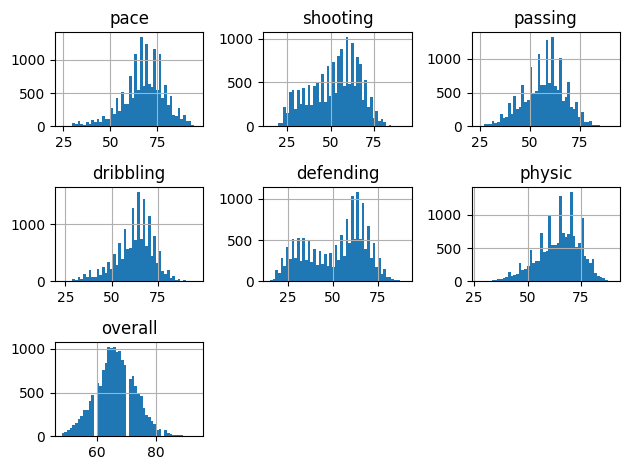

In [8]:
df.hist(bins=50)
plt.tight_layout()
plt.show()

### Dropping the outliers

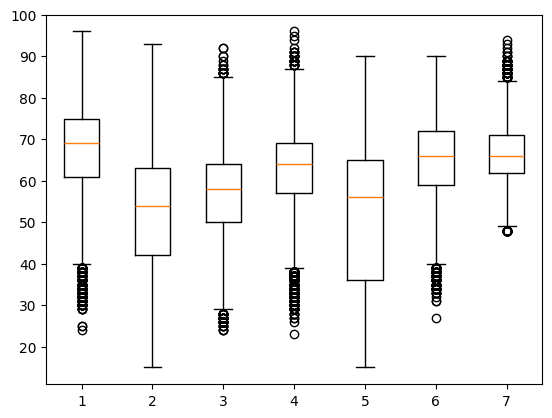

In [9]:
plt.boxplot(df)
plt.show()

In [12]:
for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    
    IQR = Q3 - Q1
    
    upper_whisker = Q3+1.5*IQR
    lower_whisker = Q1-1.5*IQR
    
    df = df[(df[col]<upper_whisker)&(df[col]>lower_whisker)]

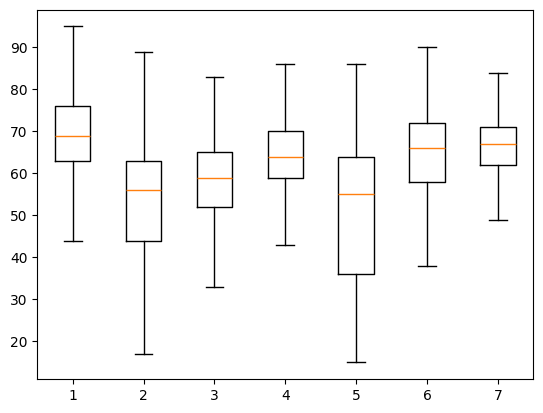

In [13]:
### Outliers has been dropped
plt.boxplot(df)
plt.show()

In [14]:
df.shape

(14704, 7)

### Correlation between features

<Axes: >

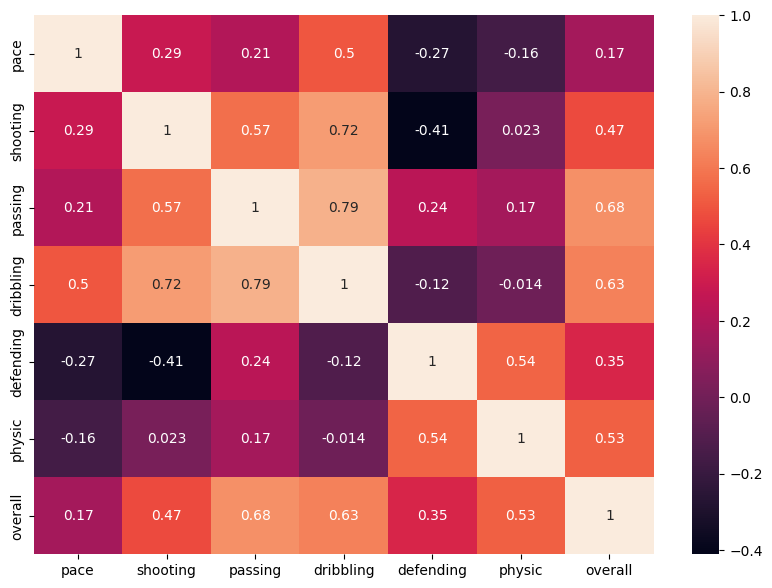

In [15]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)

### Feature creation

In [16]:
df['physic_in_pace'] = df['physic']*df['pace']
df['physic_in_shooting'] = df['physic']*df['shooting']
df['defending_in_dribbling'] = df['defending']*df['dribbling']

In [17]:
# Correlation
df.corr()['overall'].sort_values(ascending=False)

overall                   1.000000
passing                   0.678105
physic_in_shooting        0.640904
dribbling                 0.628430
defending_in_dribbling    0.552973
physic                    0.528369
physic_in_pace            0.525232
shooting                  0.470424
defending                 0.348301
pace                      0.166702
Name: overall, dtype: float64

### Creating the model

In [18]:
# The inputs and label
X = df.drop(['overall'],axis=1)
y = df['overall']

In [19]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,train_size=0.8,random_state=42)

In [20]:
std = preprocessing.StandardScaler()
Xtrain_scaled = std.fit_transform(Xtrain)
Xtest_scaled = std.transform(Xtest)

In [21]:
model = RandomForestRegressor(random_state=42)
model.fit(Xtrain_scaled,ytrain)

RandomForestRegressor(random_state=42)

In [22]:
pred = model.predict(Xtest_scaled)
print(f'MAE:{metrics.mean_absolute_error(ytest,pred)}')
print(f'R2:{metrics.r2_score(ytest,pred)}')

MAE:0.9903876232573956
R2:0.9615901038990232


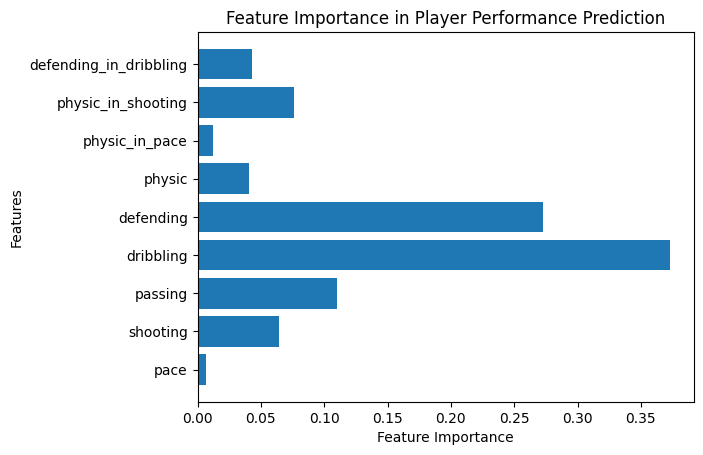

In [23]:
# Feature importance
importances = model.feature_importances_
features = X.columns

plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Player Performance Prediction")
plt.show()

### Cross validation

In [24]:
scoring = cross_val_score(model,Xtrain_scaled,ytrain,cv=10,scoring='neg_mean_absolute_error')
scored = -scoring
print(f'cross_val_score:{scored}')
print(f'mean cross_val_score:{np.mean(scored)}')

cross_val_score:[0.97761257 1.02982158 1.02671198 1.01603741 1.00537415 1.00017007
 1.00769558 0.99112245 0.99021259 0.97946429]
mean cross_val_score:1.0024222664851838
